# **CNN based Model**

In [ ]:
# STEP 1: Install Libraries
!pip install kagglehub opencv-python

# STEP 2: Import Libraries
import kagglehub
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# STEP 3: Download the Dataset
path = kagglehub.dataset_download("msambare/fer2013")
print("Dataset downloaded at:", path)

# STEP 4: Prepare Data
train_dir = os.path.join(path, "train")
test_dir = os.path.join(path, "test")

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

# STEP 5: Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 emotion classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# STEP 6: Train the Model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=test_generator
)

# STEP 7: Save the Model
model.save('emotion_detector_model.h5')
print("✅ Model trained and saved!")

# STEP 8: Plot Training Results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

# STEP 9: Real-Time Emotion Detection Using Webcam
# Load the trained model
model = tf.keras.models.load_model('emotion_detector_model.h5')

# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start Webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        face = cv2.resize(face, (48, 48))
        face = face/255.0
        face = np.reshape(face, (1, 48, 48, 1))

        # Predict Emotion
        prediction = model.predict(face)
        emotion = emotion_labels[np.argmax(prediction)]

        # Draw rectangle and put text
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)

    cv2.imshow('Real-Time Emotion Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Dataset downloaded at: /kaggle/input/fer2013
Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
 72/449 ━━━━━━━━━━━━━━━━━━━━ 2:01 322ms/step - accuracy: 0.2443 - loss: 1.8739

KeyboardInterrupt: 

Dataset downloaded at: /kaggle/input/fer2013
Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.2246 - loss: 2.0703
Epoch 1: val_accuracy improved from -inf to 0.24896, saving model to best_emotion_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 187s 404ms/step - accuracy: 0.2246 - loss: 2.0699 - val_accuracy: 0.2490 - val_loss: 1.8406
Epoch 2/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.2559 - loss: 1.8126
Epoch 2: val_accuracy improved from 0.24896 to 0.29576, saving model to best_emotion_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - accuracy: 0.2559 - loss: 1.8126 - val_accuracy: 0.2958 - val_loss: 1.7531
Epoch 3/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.2640 - loss: 1.7817
Epoch 3: val_accuracy did not improve from 0.29576
449/449 ━━━━━━━━━━━━━━━━━━━━ 47s 104ms/step - accuracy: 0.2640 - loss: 1.7816 - val_accuracy: 0.2813 - val_loss: 1.7138
Epoch 4/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.2846 - loss: 1.7327
Epoch 4: val_accuracy did not improve from 0.29576
449/449 ━━━━━━━━━━━━━━━━━━━━ 42s 93ms/step - accuracy: 0.2846 - loss: 1.7326 - val_accuracy: 0.2827 - val_loss: 1.7033
Epoch 5/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.3167 - loss: 1.6690
Epoch 5: val_accuracy improved from 0.29576 to 0.38911, saving model to best_emotion_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 42s 93ms/step - accuracy: 0.3167 - loss: 1.6690 - val_accuracy: 0.3891 - val_loss: 1.5202
Epoch 6/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.3380 - loss: 1.6262
Epoch 6: val_accuracy improved from 0.38911 to 0.40123, saving model to best_emotion_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 82s 93ms/step - accuracy: 0.3381 - loss: 1.6262 - val_accuracy: 0.4012 - val_loss: 1.5263
Epoch 7/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.3555 - loss: 1.5947
Epoch 7: val_accuracy did not improve from 0.40123
449/449 ━━━━━━━━━━━━━━━━━━━━ 44s 97ms/step - accuracy: 0.3555 - loss: 1.5947 - val_accuracy: 0.2988 - val_loss: 1.6857
Epoch 8/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.3703 - loss: 1.5746
Epoch 8: val_accuracy did not improve from 0.40123
449/449 ━━━━━━━━━━━━━━━━━━━━ 42s 94ms/step - accuracy: 0.3703 - loss: 1.5746 - val_accuracy: 0.3806 - val_loss: 1.5411
Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 5.


✅ Best model loaded!


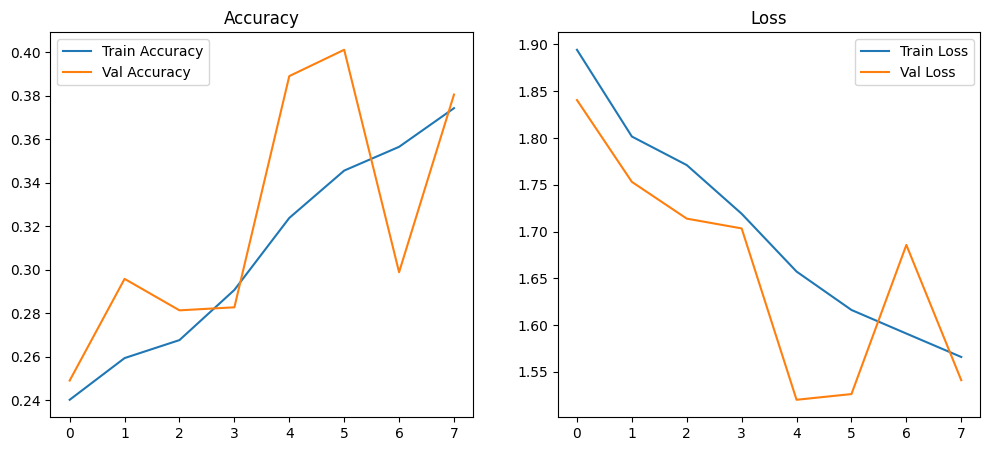

In [ ]:
# STEP 1: Install Libraries
!pip install kagglehub opencv-python

# STEP 2: Import Libraries
import kagglehub
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# STEP 3: Download Dataset
path = kagglehub.dataset_download("msambare/fer2013")
print("Dataset downloaded at:", path)

# STEP 4: Prepare Data
train_dir = os.path.join(path, "train")
test_dir = os.path.join(path, "test")

# Data Augmentation to reduce overfitting
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

# STEP 5: Build the Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# STEP 6: Set Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint('best_emotion_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

callbacks = [early_stop, model_checkpoint]

# STEP 7: Train the Model
history = model.fit(
    train_generator,
    epochs=10,  # ✅ only 10 epochs
    validation_data=test_generator,
    callbacks=callbacks
)

# STEP 8: Load Best Model
model = tf.keras.models.load_model('best_emotion_model.h5')
print("✅ Best model loaded!")

# STEP 9: Plot Training History
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

# STEP 10: Real-Time Emotion Detection (Webcam)
# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start Webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        face = cv2.resize(face, (48, 48))
        face = face/255.0
        face = np.reshape(face, (1, 48, 48, 1))

        prediction = model.predict(face)
        emotion = emotion_labels[np.argmax(prediction)]

        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)

    cv2.imshow('Real-Time Emotion Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
import tensorflow as tf
import numpy as np
import cv2

# STEP 1: Load the saved best model
# Load saved model only for prediction
model = tf.keras.models.load_model('best_emotion_model.h5', compile=False)
print("✅ Model loaded successfully!")

# STEP 2: Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# STEP 3: Load OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# STEP 4: Start Webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale for face detection only
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Extract the face from color frame (not gray!)
        face = frame[y:y+h, x:x+w]

        # Resize face for ResNet50 input (224x224 RGB)
        face = cv2.resize(face, (224, 224))
        face = face / 255.0  # Normalize to [0, 1]
        face = np.reshape(face, (1, 224, 224, 3))

        # Predict
        prediction = model.predict(face)
        emotion = emotion_labels[np.argmax(prediction)]

        # Draw rectangle and emotion label
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)

    # Show frame
    cv2.imshow('Real-Time Emotion Detection', frame)

    # Exit if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


✅ Model loaded successfully!


Saving test1.jpg to test1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


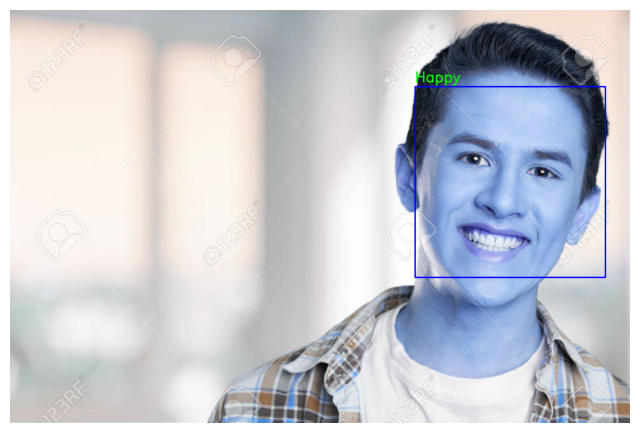

In [ ]:
# STEP 1: Install necessary libraries (if needed)
!pip install tensorflow opencv-python

# STEP 2: Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from google.colab import files
from PIL import Image

# STEP 3: Load your saved model
model = load_model('best_emotion_model.h5')

# Emotion labels (update if different order)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# STEP 4: Upload images
uploaded = files.upload()

# STEP 5: Process and Predict
for fn in uploaded.keys():
    # Load the image
    img = Image.open(fn).convert('RGB')
    img = np.array(img)

    # Load Haar Cascade for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    # Draw and predict emotion for each face
    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        face = cv2.resize(face, (48, 48))    # If you trained with 48x48
        face = face / 255.0                  # Normalize
        face = np.reshape(face, (1, 48, 48, 1))  # (Batch, Height, Width, Channels)

        prediction = model.predict(face)
        emotion = emotion_labels[np.argmax(prediction)]

        # Draw rectangle and emotion label
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(img, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

    # Display the final image
    plt.figure(figsize=(8,8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


Saving test2.jpg to test2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


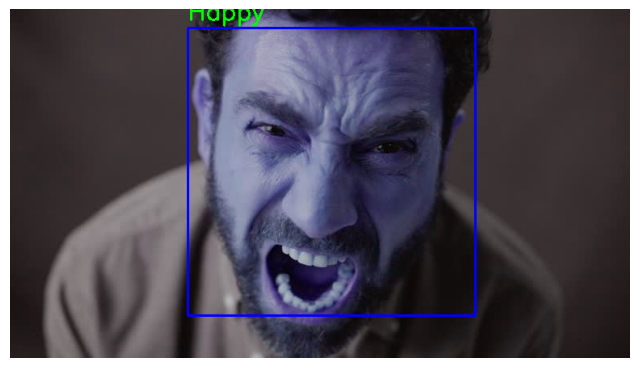

In [ ]:
# STEP 3: Load your saved model
model = load_model('best_emotion_model.h5')

# Emotion labels (update if different order)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# STEP 4: Upload images
uploaded = files.upload()

# STEP 5: Process and Predict
for fn in uploaded.keys():
    # Load the image
    img = Image.open(fn).convert('RGB')
    img = np.array(img)

    # Load Haar Cascade for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    # Draw and predict emotion for each face
    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        face = cv2.resize(face, (48, 48))    # If you trained with 48x48
        face = face / 255.0                  # Normalize
        face = np.reshape(face, (1, 48, 48, 1))  # (Batch, Height, Width, Channels)

        prediction = model.predict(face)
        emotion = emotion_labels[np.argmax(prediction)]

        # Draw rectangle and emotion label
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(img, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

    # Display the final image
    plt.figure(figsize=(8,8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


# Densenet Based model And fine tuning

Dataset downloaded at: /kaggle/input/fer2013
Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/17


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2862 - loss: 1.7927
Epoch 1: val_accuracy improved from -inf to 0.41181, saving model to best_densenet_emotion_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 601s 1s/step - accuracy: 0.2862 - loss: 1.7925 - val_accuracy: 0.4118 - val_loss: 1.5386
Epoch 2/17
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 944ms/step - accuracy: 0.3712 - loss: 1.6089
Epoch 2: val_accuracy did not improve from 0.41181
449/449 ━━━━━━━━━━━━━━━━━━━━ 442s 984ms/step - accuracy: 0.3712 - loss: 1.6089 - val_accuracy: 0.4113 - val_loss: 1.5048
Epoch 3/17
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 810ms/step - accuracy: 0.3903 - loss: 1.5818
Epoch 3: val_accuracy improved from 0.41181 to 0.42714, saving model to best_densenet_emotion_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 382s 850ms/step - accuracy: 0.3903 - loss: 1.5817 - val_accuracy: 0.4271 - val_loss: 1.4801
Epoch 4/17
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 797ms/step - accuracy: 0.3992 - loss: 1.5557
Epoch 4: val_accuracy improved from 0.42714 to 0.44149, saving model to best_densenet_emotion_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 376s 838ms/step - accuracy: 0.3992 - loss: 1.5557 - val_accuracy: 0.4415 - val_loss: 1.4477
Epoch 5/17
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 877ms/step - accuracy: 0.4003 - loss: 1.5477
Epoch 5: val_accuracy improved from 0.44149 to 0.44427, saving model to best_densenet_emotion_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 472s 1s/step - accuracy: 0.4003 - loss: 1.5477 - val_accuracy: 0.4443 - val_loss: 1.4391
Epoch 6/17
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 848ms/step - accuracy: 0.4016 - loss: 1.5446
Epoch 6: val_accuracy improved from 0.44427 to 0.45013, saving model to best_densenet_emotion_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 399s 889ms/step - accuracy: 0.4016 - loss: 1.5445 - val_accuracy: 0.4501 - val_loss: 1.4335
Epoch 7/17
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 823ms/step - accuracy: 0.4084 - loss: 1.5280
Epoch 7: val_accuracy improved from 0.45013 to 0.45430, saving model to best_densenet_emotion_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 391s 870ms/step - accuracy: 0.4084 - loss: 1.5280 - val_accuracy: 0.4543 - val_loss: 1.4168
Epoch 8/17
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 821ms/step - accuracy: 0.4074 - loss: 1.5300
Epoch 8: val_accuracy improved from 0.45430 to 0.46420, saving model to best_densenet_emotion_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 387s 863ms/step - accuracy: 0.4074 - loss: 1.5300 - val_accuracy: 0.4642 - val_loss: 1.4090
Epoch 9/17
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 816ms/step - accuracy: 0.4105 - loss: 1.5154
Epoch 9: val_accuracy did not improve from 0.46420
449/449 ━━━━━━━━━━━━━━━━━━━━ 385s 857ms/step - accuracy: 0.4105 - loss: 1.5154 - val_accuracy: 0.4599 - val_loss: 1.4047
Epoch 10/17
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 814ms/step - accuracy: 0.4194 - loss: 1.5143
Epoch 10: val_accuracy did not improve from 0.46420
449/449 ━━━━━━━━━━━━━━━━━━━━ 383s 854ms/step - accuracy: 0.4194 - loss: 1.5142 - val_accuracy: 0.4632 - val_loss: 1.3964
Epoch 11/17
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 805ms/step - accuracy: 0.4157 - loss: 1.5104
Epoch 11: val_accuracy improved from 0.46420 to 0.47437, saving model to best_densenet_emotion_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 380s 845ms/step - accuracy: 0.4157 - loss: 1.5104 - val_accuracy: 0.4744 - val_loss: 1.3892
Epoch 12/17
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 822ms/step - accuracy: 0.4146 - loss: 1.5126
Epoch 12: val_accuracy did not improve from 0.47437
449/449 ━━━━━━━━━━━━━━━━━━━━ 408s 903ms/step - accuracy: 0.4146 - loss: 1.5126 - val_accuracy: 0.4706 - val_loss: 1.3855
Epoch 13/17
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 998ms/step - accuracy: 0.4188 - loss: 1.5041
Epoch 13: val_accuracy did not improve from 0.47437
449/449 ━━━━━━━━━━━━━━━━━━━━ 466s 1s/step - accuracy: 0.4188 - loss: 1.5041 - val_accuracy: 0.4615 - val_loss: 1.4023
Epoch 14/17
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 814ms/step - accuracy: 0.4179 - loss: 1.5029
Epoch 14: val_accuracy did not improve from 0.47437
449/449 ━━━━━━━━━━━━━━━━━━━━ 383s 853ms/step - accuracy: 0.4179 - loss: 1.5028 - val_accuracy: 0.4709 - val_loss: 1.3873
Epoch 15/17
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 817ms/step - accuracy: 0.4209 - loss: 1.4998
Epoch 1

449/449 ━━━━━━━━━━━━━━━━━━━━ 379s 845ms/step - accuracy: 0.4267 - loss: 1.4874 - val_accuracy: 0.4792 - val_loss: 1.3622
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 804ms/step - accuracy: 0.4383 - loss: 1.4695
Epoch 4: val_accuracy improved from 0.47924 to 0.48481, saving model to best_densenet_emotion_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 383s 852ms/step - accuracy: 0.4383 - loss: 1.4695 - val_accuracy: 0.4848 - val_loss: 1.3518
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 815ms/step - accuracy: 0.4447 - loss: 1.4584
Epoch 5: val_accuracy improved from 0.48481 to 0.48649, saving model to best_densenet_emotion_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 384s 855ms/step - accuracy: 0.4447 - loss: 1.4584 - val_accuracy: 0.4865 - val_loss: 1.3409
Restoring model weights from the end of the best epoch: 5.


✅ Best DenseNet121 model loaded!


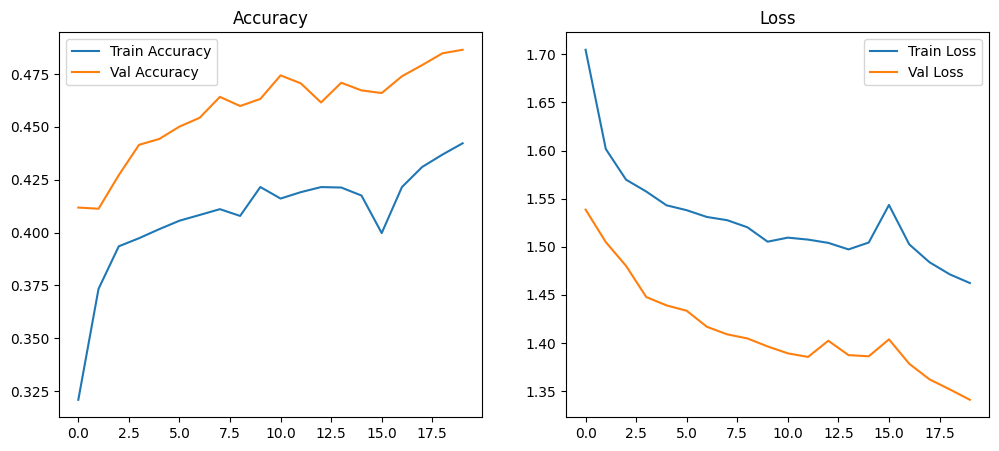

In [ ]:
# STEP 1: Install Libraries
!pip install kagglehub opencv-python

# STEP 2: Import Libraries
import kagglehub
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.applications import DenseNet121  # Use DenseNet121 here

# STEP 3: Download Dataset
path = kagglehub.dataset_download("msambare/fer2013")
print("Dataset downloaded at:", path)

# STEP 4: Prepare Data
train_dir = os.path.join(path, "train")
test_dir = os.path.join(path, "test")

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # DenseNet expects 224x224 input
    batch_size=64,
    color_mode='rgb',        # DenseNet expects 3-channel RGB images
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    color_mode='rgb',
    class_mode='categorical'
)

# STEP 5: Build Model using DenseNet121
base_model = DenseNet121(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

# Freeze base model layers initially
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# STEP 6: Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint('best_densenet_emotion_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

callbacks = [early_stop, model_checkpoint]

# STEP 7: Train Top Layers
history = model.fit(
    train_generator,
    epochs=17,
    validation_data=test_generator,
    callbacks=callbacks
)

# STEP 8: Fine-tuning (Unfreeze some deeper layers)
for layer in base_model.layers[-30:]:  # Fine-tune last 30 layers
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])  # Lower learning rate

# Train again
fine_tune_history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator,
    callbacks=callbacks
)

# STEP 9: Load Best Model
model = tf.keras.models.load_model('best_densenet_emotion_model.h5')
print("✅ Best DenseNet121 model loaded!")

# STEP 10: Plot Training History
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'] + fine_tune_history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'] + fine_tune_history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'] + fine_tune_history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'] + fine_tune_history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()


Saving test6.webp to test6.webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


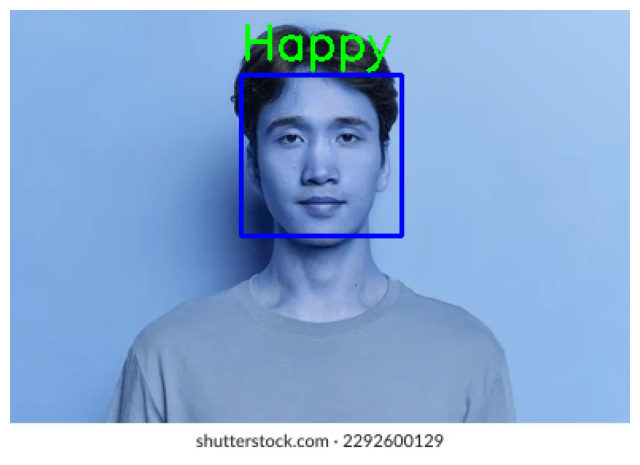

In [ ]:
# STEP 1: Imports
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files  # <- You forgot this!
from PIL import Image           # <- And this!

# STEP 2: Load your saved model
model = load_model('best_densenet_emotion_model.h5')

# STEP 3: Emotion labels (update if different order)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# STEP 4: Upload images
uploaded = files.upload()

# STEP 5: Process and Predict
for fn in uploaded.keys():
    # Load the image
    img = Image.open(fn).convert('RGB')
    img = np.array(img)

    # Load Haar Cascade for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # Changed to RGB2GRAY because img is RGB after PIL

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    # Draw and predict emotion for each face
    for (x, y, w, h) in faces:
      face = img[y:y+h, x:x+w]  # Take face from original RGB image (NOT from gray!)
      face = cv2.resize(face, (224, 224))    # Resize to 224x224
      face = face / 255.0                    # Normalize
      face = np.expand_dims(face, axis=0)    # Shape: (1, 224, 224, 3)

      prediction = model.predict(face)
      emotion = emotion_labels[np.argmax(prediction)]

      # Draw rectangle and emotion label
      cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
      cv2.putText(img, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)


    # Display the final image
    plt.figure(figsize=(8,8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()



In [ ]:
# STEP 1: Install Libraries
!pip install kagglehub opencv-python

# STEP 2: Import Libraries
import kagglehub
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Flatten, Input
from tensorflow.keras.applications import VGG16  # Use VGG16 here

# STEP 3: Download Dataset
path = kagglehub.dataset_download("msambare/fer2013")
print("Dataset downloaded at:", path)

# STEP 4: Prepare Data
train_dir = os.path.join(path, "train")
test_dir = os.path.join(path, "test")

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # VGG16 expects 224x224 input
    batch_size=64,
    color_mode='rgb',        # VGG16 expects 3-channel RGB images
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    color_mode='rgb',
    class_mode='categorical'
)

# STEP 5: Build Model using VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

# Freeze base model layers initially
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)  # You can also use Flatten() instead
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# STEP 6: Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint('best_vgg16_emotion_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

callbacks = [early_stop, model_checkpoint]

# STEP 7: Train Top Layers
history = model.fit(
    train_generator,
    epochs=17,
    validation_data=test_generator,
    callbacks=callbacks
)

# STEP 8: Fine-tuning (Unfreeze some deeper layers)
for layer in base_model.layers[-5:]:  # Fine-tune last 5 layers of VGG16
    layer.trainable = True

# Re-compile with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Train again
fine_tune_history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator,
    callbacks=callbacks
)

# STEP 9: Load Best Model
model = tf.keras.models.load_model('best_vgg16_emotion_model.h5')
print("✅ Best VGG16 model loaded!")

# STEP 10: Plot Training History
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'] + fine_tune_history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'] + fine_tune_history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'] + fine_tune_history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'] + fine_tune_history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()


Dataset downloaded at: /kaggle/input/fer2013
Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/17


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_7775']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


 19/449 ━━━━━━━━━━━━━━━━━━━━ 9:24 1s/step - accuracy: 0.1771 - loss: 2.0124

KeyboardInterrupt: 

# **VGG16 based model + Finetuning**

In [ ]:
# STEP 1: Install Libraries
!pip install kagglehub opencv-python

# STEP 2: Import Libraries
import kagglehub
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization, Input
from tensorflow.keras.applications import VGG16

# STEP 3: Download Dataset
path = kagglehub.dataset_download("msambare/fer2013")
print("✅ Dataset downloaded at:", path)

# STEP 4: Prepare Data
train_dir = os.path.join(path, "train")
test_dir = os.path.join(path, "test")

# Data Augmentation (stronger augmentation to avoid overfitting)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical'
)

# STEP 5: Build Model using VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

# Freeze all layers initially
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)   # New: Batch Normalization
x = Dense(512, activation='relu')(x)
x = Dropout(0.6)(x)            # New: Higher dropout
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# STEP 6: Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint('best_vgg16_emotion_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-7)

callbacks = [early_stop, model_checkpoint, reduce_lr]

# STEP 7: Train Top Layers
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=callbacks
)

# STEP 8: Fine-tuning (Unfreeze deeper layers)
for layer in base_model.layers[-8:]:  # Fine-tune last 8 layers (instead of only last 5)
    layer.trainable = True

# Re-compile with smaller learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train again
fine_tune_history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=callbacks
)

# STEP 9: Load Best Model
model = tf.keras.models.load_model('best_vgg16_emotion_model.h5')
print("✅ Best fine-tuned VGG16 model loaded!")

# STEP 10: Plot Training History
plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'] + fine_tune_history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'] + fine_tune_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'] + fine_tune_history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'] + fine_tune_history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


✅ Dataset downloaded at: /kaggle/input/fer2013
Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.1955 - loss: 2.1030
Epoch 1: val_accuracy improved from -inf to 0.29604, saving model to best_vgg16_emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 550s 595ms/step - accuracy: 0.1955 - loss: 2.1028 - val_accuracy: 0.2960 - val_loss: 1.7388 - learning_rate: 1.0000e-04
Epoch 2/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.2524 - loss: 1.8179
Epoch 2: val_accuracy improved from 0.29604 to 0.32140, saving model to best_vgg16_emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 428s 477ms/step - accuracy: 0.2524 - loss: 1.8179 - val_accuracy: 0.3214 - val_loss: 1.7209 - learning_rate: 1.0000e-04
Epoch 3/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.2764 - loss: 1.7669
Epoch 3: val_accuracy improved from 0.32140 to 0.32391, saving model to best_vgg16_emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 431s 480ms/step - accuracy: 0.2764 - loss: 1.7669 - val_accuracy: 0.3239 - val_loss: 1.6964 - learning_rate: 1.0000e-04
Epoch 4/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.2882 - loss: 1.7494
Epoch 4: val_accuracy improved from 0.32391 to 0.32767, saving model to best_vgg16_emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 426s 475ms/step - accuracy: 0.2882 - loss: 1.7494 - val_accuracy: 0.3277 - val_loss: 1.6867 - learning_rate: 1.0000e-04
Epoch 5/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.2973 - loss: 1.7259
Epoch 5: val_accuracy improved from 0.32767 to 0.34062, saving model to best_vgg16_emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 445s 478ms/step - accuracy: 0.2973 - loss: 1.7259 - val_accuracy: 0.3406 - val_loss: 1.6676 - learning_rate: 1.0000e-04
Epoch 6/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.3062 - loss: 1.7132
Epoch 6: val_accuracy improved from 0.34062 to 0.34104, saving model to best_vgg16_emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 429s 478ms/step - accuracy: 0.3062 - loss: 1.7132 - val_accuracy: 0.3410 - val_loss: 1.6565 - learning_rate: 1.0000e-04
Epoch 7/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.3106 - loss: 1.6995
Epoch 7: val_accuracy improved from 0.34104 to 0.34216, saving model to best_vgg16_emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 427s 476ms/step - accuracy: 0.3106 - loss: 1.6995 - val_accuracy: 0.3422 - val_loss: 1.6539 - learning_rate: 1.0000e-04
Epoch 8/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.3228 - loss: 1.6921
Epoch 8: val_accuracy improved from 0.34216 to 0.35038, saving model to best_vgg16_emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 435s 485ms/step - accuracy: 0.3228 - loss: 1.6921 - val_accuracy: 0.3504 - val_loss: 1.6457 - learning_rate: 1.0000e-04
Epoch 9/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.3258 - loss: 1.6810
Epoch 9: val_accuracy did not improve from 0.35038
898/898 ━━━━━━━━━━━━━━━━━━━━ 439s 489ms/step - accuracy: 0.3258 - loss: 1.6810 - val_accuracy: 0.3394 - val_loss: 1.6381 - learning_rate: 1.0000e-04
Epoch 10/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.3324 - loss: 1.6768
Epoch 10: val_accuracy did not improve from 0.35038
898/898 ━━━━━━━━━━━━━━━━━━━━ 430s 479ms/step - accuracy: 0.3324 - loss: 1.6768 - val_accuracy: 0.3441 - val_loss: 1.6281 - learning_rate: 1.0000e-04
Epoch 11/30
196/898 ━━━━━━━━━━━━━━━━━━━━ 5:01 429ms/step - accuracy: 0.3431 - loss: 1.6786

# **Mobile Net V2 transfer learning**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import kagglehub

path = kagglehub.dataset_download("msambare/fer2013")
train_dir = os.path.join(path, "train")
test_dir = os.path.join(path, "test")

img_size = 224
batch_size = 32

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse'
)

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_size, img_size, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(7, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=1e-6)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[early_stop, reduce_lr]
)

model.save('Final_FER2013_model.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 1712s 2s/step - accuracy: 0.2512 - loss: 2.2938 - val_accuracy: 0.3649 - val_loss: 1.8835 - learning_rate: 5.0000e-04
Epoch 2/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 1791s 2s/step - accuracy: 0.3221 - loss: 1.8788 - val_accuracy: 0.3559 - val_loss: 1.7346 - learning_rate: 5.0000e-04
Epoch 3/20
 51/898 ━━━━━━━━━━━━━━━━━━━━ 21:46 2s/step - accuracy: 0.3649 - loss: 1.7845